## Colab 환경에서 하는 것을 권장합니다.

# 사전 준비

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# cd drive/MyDrive/TextMining_WordEmbedding

In [157]:
#konlpy 설치 (mecab 제외). 3~40초 정도 소요
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 1s (198 kB/s)
Reading package lis

In [158]:
# java 경로 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [159]:
# 필요 라이브러리 불러오기
import os, json
from tqdm.notebook import tqdm

from konlpy.tag import Okt

from gensim.models import Word2Vec

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [160]:
%cd '/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0830] TextMining_WordEmbedding/TextMining_WordEmbedding'

/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-2학기/[0830] TextMining_WordEmbedding/TextMining_WordEmbedding


In [161]:
# data 불러오기
data_dir = os.path.join(os.getcwd(), 'data')

corpus = []
for i in tqdm(os.listdir(data_dir)):
    with open(os.path.join(data_dir, i), 'r') as f:
        json_data = json.load(f)
    corpus.append(json_data['sentences'])
corpus = sum(corpus, [])

  0%|          | 0/50 [00:00<?, ?it/s]

데이터를 확인하고 어떻게 전처리를 하고 토큰화를 해야 할 지 고민해보세요!

In [162]:
corpus[:50]

['피어티칭·무감독시험 골자…"자기 길 가는 \'이탈자\' 육성이 목표"',
 '매년 노벨상 발표 시즌이 되면 옆 나라 일본과 달리 과학 분야 노벨상을 내지 못하는 한국의 과학 현실을 비판하는 목소리가 터져 나온다',
 '국내 연구제도 등과 함께 단골로 지적되는 것이 교육 문제다',
 "초등학교, 중학교, 고등학교에 이르기까지 '정답'만을 찾아 문제를 푸는 방식에 익숙해진 학생에게 새로운 분야를 개척할 창의성이 나오기 힘들다는 지적이다",
 '서울대 자연과학대학은 학생들이 정형화된 문제 풀이 방식에서 벗어나 창의적인 생각을 할 수 있도록 수업 방식을 바꾸자는 취지로 교육개혁위원회를 꾸렸다고 10일 밝혔다',
 '기초교육원 부원장을 역임한 유재준 물리학과 교수에게 위원장을 맡겼다',
 '각 학과의 교수들을 추천받아 이달 중 위원회를 구성을 완료할 방침이다',
 '내년부터는 각 학과에서 2∼3과목을 시작으로 강의 교수 방법 등에 변화를 모색한다',
 "교수가 일방적으로 강의하는 게 아니라 학생들이 미리 수업 내용을 예습하고서 수업 시간에는 질문만 하는 '플립러닝', 동료끼리 서로 가르치는 '피어티칭' 등이 도입된다고 한다",
 '평가 방식도 기존 시험 출제와 채점에 더해 동료의 평가를 덧붙이는 것을 검토 중이다',
 "이들 수업 중 일부에는 자연대가 지난해부터 준비해온 '무감독시험'도 적용된다",
 "자연대는 서울대 단과대학 중 처음으로 시험감독이 없는 상태에서 학생들이 양심에 따라 시험을 치르는 무감독시험과, 이를 위한 전제인 '아너 코드'(Honor code·명예규칙)를 준비해왔다",
 "자연대는 이러한 '교육개혁'을 통해 학생 본인의 주관에 따라 자신 있게 연구를 개척하는 '이탈자'를 많이 육성하기를 기대한다",
 '이는 서울대 재학생이 고등학생까지의 관성에 젖어 대학에서도 시험문제를 잘 풀지만, 자신의 답이 정답이 아니면 불안해하고 자신 있게 본인의 생각을 밝히지 못하는 경향이 있다는 자연대 교수들의 관찰과 자성이 바탕이 됐다',
 '유재준 위원장은 "과거

# 1번

자신만의 CustomTokenization을 만들어보세요! 세션에서 말씀 드렸듯이 정답이 있는 것이 아닙니다. 

제가 세션에서 설명했던 것 처럼 pos를 이용하여 품사를 구하고 품사를 통해 stop words를 지정해서 제거해 줄 수 있고, 따로 stopw words를 지정해서 의미 없다고 생각하는 단어들을 제거해도 상관 없습니다!

물론 Okt말고 다른 Tokenizer를 사용해도 괜찮습니다. 

다양한 방법으로 전처리를 진행해보고 왜 그런 전처리와 tokenizing 방법을 사용했는지 설명해주세요!

### 전처리 해석
- 'Josa','Suffix','Punctuation', 'Foreign', 'Number'의 경우 corpus상에서 의미를 갖지 않거나, 의미 해석의 변동 여부가 크거나, 숫자의미로 한정적이기 때문에 제외한다. 
- 어근을 구분하고, 
- 같은 표현을 정규화하였다. 
- 이는 모두 코퍼스 내의 단어들의 해석의 용이성과 고유성을 유지하기 위함이다.

In [163]:
okt = Okt()

In [164]:
# 자신만의 tokenization, preprocess 규칙을 만들고 그 규칙에 맞는 CustomTokenizer를 만들어보세요.
# 한 문장을 input으로 받아 token이 들어있는 list를 반환하는 함수를 구현해보세요.
def CustomTokenization_1(sentence):
    return okt.morphs(sentence)

In [165]:
def CustomTokenization_2(corpus, stop = ['Josa','Suffix','Punctuation', 'Foreign', 'Number']):
    tokenized = []
    for i, j in okt.pos(corpus, stem = True, norm = True):
        if j in stop:
            continue
        tokenized.append(i)
    return tokenized    

In [169]:
# corpus_tokenized 안에 CustomTokenization의 return값이 들어 있는 2중 list를 만들어 보세요
corpus_tokenized_1 = []
for i in tqdm(corpus):
    corpus_tokenized_1.append(CustomTokenization_1(i))
corpus_tokenized_1[:1]

  0%|          | 0/1020 [00:00<?, ?it/s]

[['피어',
  '티칭',
  '·',
  '무',
  '감독',
  '시험',
  '골자',
  '…"',
  '자기',
  '길',
  '가는',
  "'",
  '이탈',
  '자',
  "'",
  '육성',
  '이',
  '목표',
  '"']]

In [168]:
corpus_tokenized_2 = []
for i in tqdm(corpus):
    corpus_tokenized_2.append(CustomTokenization_2(i))
corpus_tokenized_2[:1]

  0%|          | 0/1020 [00:00<?, ?it/s]

[['피어', '티칭', '무', '감독', '시험', '골자', '자기', '길', '가다', '이탈', '육성', '목표']]

# 2번

이제 word2vec 모델을 학습시켜 봅시다!

1. 사전학습 없이 모델 학습
2. 사전학습 된 모델을 사용하여 학습

두가지를 진행해보세요

hyperparameter는 본인이 하고 싶으신 것으로 하면 됩니다. 단, 사전학습 된 모델을 사용할 때는 size = 200으로 맞추어 주세요!

hyperparameter 설정 기준을 설명해주세요!

### hyperparameter 기준
- corpus에서 제외되는 단어가 없도록 min_count기준만 0으로 설정해주었다.

In [ ]:
# 사전학습 없이 모델 학습
# 모델 생성
model_no_pretrained = Word2Vec(size = len(corpus_tokenized_2), min_count = 0)

# 모델 vocabulary 추가
model_no_pretrained.build_vocab(corpus_tokenized_2)

total_examples = model_no_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_no_pretrained.wv.vocab))

현재 vocabulary size(V) : 3808


In [ ]:
# 모델 학습
model_no_pretrained.train(corpus_tokenized_2, total_examples = total_examples, epochs = 10)

(149839, 168420)

In [ ]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_no_pretrained.wv.most_similar('창의성')

[('선', 0.9859894514083862),
 ('원자', 0.9859216809272766),
 ('살다', 0.9859145879745483),
 ('작다', 0.9858976006507874),
 ('질환', 0.9858909249305725),
 ('지난', 0.9858806133270264),
 ('거리', 0.9858717322349548),
 ('지구', 0.985866904258728),
 ('나오다', 0.9858591556549072),
 ('유전자', 0.9858567714691162)]

In [ ]:
# 사전학습 된 모델을 사용하여 학습
#사전학습 된 모델 불러오기
pretrained = Word2Vec.load('ko.bin')

print('Pretrained model의 단어 수(V) :', len(pretrained.wv.vocab))
print('Pretrained model의 embedding vector의 size(N) :', len(pretrained.wv['강아지']))

# 모델 생성
model_pretrained = Word2Vec(size = pretrained.wv.vector_size, min_count = 0)

# 모델 vocabulary 추가
model_pretrained.build_vocab(corpus_tokenized_2)

total_examples = model_pretrained.corpus_count
print('현재 vocabulary size(V) :',len(model_pretrained.wv.vocab))

Pretrained model의 단어 수(V) : 30185
Pretrained model의 embedding vector의 size(N) : 200
현재 vocabulary size(V) : 3808


In [ ]:
#pretrained model의 학습되어 있는 vocabulary list 불러오기
model_pretrained.build_vocab([list(pretrained.wv.vocab.keys())], update = True)
print('현재 vocabulary size(V) :', len(model_pretrained.wv.vocab))

#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model_pretrained.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

현재 vocabulary size(V) : 31436


In [ ]:
# 모델 학습
model_pretrained.train(corpus_tokenized_2, total_examples = total_examples, epochs = 10 )

(166557, 168420)

In [ ]:
# 모델이 잘 학습 되었는지 자유롭게 확인해보세요!
# .wv.most_similar() 등 사용

model_pretrained.wv.most_similar('창의성')

[('창의력', 0.6151504516601562),
 ('개방성', 0.6111212372779846),
 ('리더십', 0.5939156413078308),
 ('역량', 0.5874838829040527),
 ('미적', 0.5873428583145142),
 ('지능', 0.5845178961753845),
 ('실재감', 0.5738157033920288),
 ('교육적', 0.573370099067688),
 ('감성', 0.569031834602356),
 ('자질', 0.5530144572257996)]

# 3번

사전 학습 없이 모델을 학습해도 성능이 괜찮나요?   
사전 학습 없이 학습한 모델과 사전 학습이 된 모델을 사용한 모델 간의 성능 차이가 있었나요? 차이가 있었다면 어떤 부분에서 차이가 나고 왜 그런 차이가 났는지 생각해보고 설명해주세요!

# 성능 차이
1. 단어벡터간 유사도를 구했지만 사실상 사람의 직관으로 보았을 때 사전 학습을 시키지 않은 경우 단어벡터간 유사도가 떨어졌다.
2. 이는 코퍼스 내에서 단어간 유사도를 측정하기에 문장 자체가 부족했기 때문으로 보인다.
3. 때문에 적절한 문장들의 개수가 포함된 pre-train모델의 성능이 더 좋았다.

# 4번

이제 학습된 모델을 통해 나온 embedding 결과를 2차원, 3차원에 embedding 시켜 봅시다.    
사전학습된 데이터를 사용하면 너무 단어 수가 많아지기 때문에 우리가 처음에 가지고 있던 corpus_tokenized 데이터만 사용하겠습니다.   
PCA, t-SNE를 사용해서 시각화하고 그 두가지 방법의 결과를 비교해보세요!   

추가적으로 무언가 재미있는 시각화 결과 (ex. 이거랑 저거랑 비슷한 위치에 임베딩 됐어요!) 가 있다면 추가적으로 남겨주세요!

### 시각화 결과
- 과학고와 아주대의 유사성이 높습니당! 
- 테슬라 - 엔진 - 과학자의 벡터 거리가 가깝습니다!
- 그래도 pretrain데이터셋을 사용한 것이 아니다보니 관계성이 인접한 노드에 나와도 연관성이 높지는 않은 것으로 보입니다.

In [ ]:
# 시각화할 단어 리스트 생성
unique_text = list(set(sum(corpus_tokenized_2, [])))
len(unique_text)

3808

In [ ]:
unique_text[:5]

['약해지다', '활발하다', '앨런', '신경망', 'SNP']

In [ ]:
model_pretrained.wv['약해지다']

array([ 0.01052428, -0.01019142, -0.01252418,  0.01392235,  0.00064449,
        0.01172382, -0.02937526,  0.02543993, -0.0079783 , -0.00615543,
        0.00985943, -0.00667181, -0.00469368, -0.03619841,  0.00417571,
       -0.00167035,  0.00473225,  0.0041857 , -0.00288901,  0.0086631 ,
       -0.01386026,  0.00998282,  0.02355985, -0.00022608,  0.00973896,
        0.00075655, -0.0004713 , -0.00705318, -0.02484042, -0.00947358,
       -0.00677589, -0.00878268, -0.0077729 , -0.01179127, -0.00563148,
       -0.01702738,  0.00442379, -0.0214369 ,  0.01331714,  0.01200521,
        0.0079096 , -0.01871376,  0.02822999,  0.01465812,  0.00608371,
        0.01085877, -0.00341644, -0.01612279, -0.00427702, -0.01115682,
       -0.00638269,  0.01046552, -0.00962491, -0.00294223, -0.00990613,
       -0.00672048,  0.01248708, -0.01319046, -0.01239191,  0.0003434 ,
       -0.00087807, -0.00212575, -0.01750305,  0.00888194, -0.00950165,
        0.00706317, -0.00202281,  0.01468647,  0.01610791,  0.00

In [ ]:
# embedding 결과 가져오기
word, vector = [], []
for i in unique_text:
    word.append(i)
    vector.append(model_no_pretrained.wv[i])

In [ ]:
pca = PCA(random_state = 0).fit_transform(vector)
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 50, learning_rate = 0.05, init = 'random', n_iter = 1000).fit_transform(vector)

In [ ]:
print(len(word))
print(len(vector))

3808
3808


In [ ]:
word[:5]

['약해지다', '활발하다', '앨런', '신경망', 'SNP']

In [ ]:
'''
import pandas as pd
vector_df = pd.DataFrame(vector)
vector_df
'''

'\nimport pandas as pd\nvector_df = pd.DataFrame(vector)\nvector_df\n'

- color 실패...

In [ ]:
# vector[0]

In [ ]:
# vector_df.iloc[0]

In [ ]:
# vector_df.iloc[0].min()

-0.007964823

In [ ]:
# color = (vector[:][:] - vector[:][:].min()) / (vector[:][:].max() - vector[:][:].min())

In [ ]:
# 시각화해보세요!
data = go.Scatter(
    x=pca[:,0],
    y=pca[:,1],
    text = ['point #{}'.format(i) for i in range(len(word))],
    mode='markers',
    marker=dict(
        size=5,
#        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=[data], layout=layout)
fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning: plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin

  DeprecationWarning,


In [ ]:
# 단어명으로 임베딩!
data = go.Scatter(
    x=pca[:,0],
    y=pca[:,1],
    text = ['point #{}'.format(i) for i in word],
    mode='markers',
    marker=dict(
        size=5,
#        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=[data], layout=layout)
fig.show()


In [ ]:
tsne = TSNE(n_components = 2, 
            random_state = 0, 
            perplexity = 50, 
            learning_rate = 0.05, 
            init = 'random', 
            n_iter = 1500).fit_transform(vector)

In [ ]:
data = go.Scatter(
    x=tsne[:,0],
    y=tsne[:,1],
    text = ['point #{}'.format(i) for i in word],
    mode='markers',
    marker=dict(
        size=5,
#        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    title={
        'text': "t-SNE : perplexity = 50, n_iter = 1500"},
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig = go.Figure(data=[data], layout=layout)
fig.show()

# 5번

t-SNE에는 perplexity라는 hyperparameter가 존재했는데요. 5~50 사이의 값에서 robust 한 결과를 보인다고는 하지만 perplexity가 달라지면서 embedding 결과가 미묘하지만 크게 바뀌기도 합니다. perplexity와 n_iter 조합을 달리해보면서 perplexity의 변화가 embedding결과에 어떤 영향을 미치는지 살펴보세요!

In [ ]:
perplexity_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for i in perplexity_list:
  print(i)

5
10
15
20
25
30
35
40
45
50


In [ ]:
# t-SNE
perplexity_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_iter_list = [500, 1000, 1500]

for perplexity__ in perplexity_list:
  for n_iter__ in n_iter_list:
    tsne = TSNE(n_components = 2, random_state = 0, perplexity = perplexity__, learning_rate = 0.05, init = 'random', n_iter = n_iter__).fit_transform(vector)

    # 시각화
    data = go.Scatter(
        x=tsne[:,0],
        y=tsne[:,1],
        text = ['point #{}'.format(i) for i in range(len(word))],
        mode='markers',
        marker=dict(
            size=5,
    #        color=color,
            colorscale='Jet',
            line=dict(
                width=0.0
            ),
            opacity=0.8
        )
    )

    layout = go.Layout(
        title={
            'text': 'perplexity : ' + str(perplexity__) + '&  n_iter : ' + str(n_iter__)},
        autosize=False,
        width=1000,
        height=1000,
        margin=go.Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )
    fig = go.Figure(data=[data], layout=layout)
    fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# n_iter를 고정하고 perplexity를 키워보자
perplexity_list = [50, 60, 70, 80, 90, 100]
n_iter_list = [1500]

for perplexity__ in perplexity_list:
  for n_iter__ in n_iter_list:
    tsne = TSNE(n_components = 2, random_state = 0, perplexity = perplexity__, learning_rate = 0.05, init = 'random', n_iter = n_iter__).fit_transform(vector)

    # 시각화
    data = go.Scatter(
        x=tsne[:,0],
        y=tsne[:,1],
        text = ['point #{}'.format(i) for i in range(len(word))],
        mode='markers',
        marker=dict(
            size=5,
    #        color=color,
            colorscale='Jet',
            line=dict(
                width=0.0
            ),
            opacity=0.8
        )
    )

    layout = go.Layout(
        title={
            'text': 'perplexity : ' + str(perplexity__) + '&  n_iter : ' + str(n_iter__)},
        autosize=False,
        width=1000,
        height=1000,
        margin=go.Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )
    fig = go.Figure(data=[data], layout=layout)
    fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [ ]:
# perplexity를 아예 키워보자!
perplexity_list = [500, 1000, 1500, 2000]
n_iter_list = [1500]

for perplexity__ in perplexity_list:
  for n_iter__ in n_iter_list:
    tsne = TSNE(n_components = 2, random_state = 0, perplexity = perplexity__, learning_rate = 0.05, init = 'random', n_iter = n_iter__).fit_transform(vector)

    # 시각화
    data = go.Scatter(
        x=tsne[:,0],
        y=tsne[:,1],
        text = ['point #{}'.format(i) for i in range(len(word))],
        mode='markers',
        marker=dict(
            size=5,
    #        color=color,
            colorscale='Jet',
            line=dict(
                width=0.0
            ),
            opacity=0.8
        )
    )

    layout = go.Layout(
        title={
            'text': 'perplexity : ' + str(perplexity__) + '&  n_iter : ' + str(n_iter__)},
        autosize=False,
        width=1000,
        height=1000,
        margin=go.Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )
    fig = go.Figure(data=[data], layout=layout)
    fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [ ]:
# perplexity를 아예 키워보자!
perplexity_list = [500]
n_iter_list = [1500]

for perplexity__ in perplexity_list:
  for n_iter__ in n_iter_list:
    tsne = TSNE(n_components = 2, random_state = 0, perplexity = perplexity__, learning_rate = 0.05, init = 'random', n_iter = n_iter__).fit_transform(vector)

    # 시각화
    data = go.Scatter(
        x=tsne[:,0],
        y=tsne[:,1],
        text = ['point #{}'.format(i) for i in word],
        mode='markers',
        marker=dict(
            size=5,
    #        color=color,
            colorscale='Jet',
            line=dict(
                width=0.0
            ),
            opacity=0.8
        )
    )

    layout = go.Layout(
        title={
            'text': 'perplexity : ' + str(perplexity__) + '&  n_iter : ' + str(n_iter__)},
        autosize=False,
        width=1000,
        height=1000,
        margin=go.Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
    )
    fig = go.Figure(data=[data], layout=layout)
    fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### iteration
- iteration이 커질 수록 벡터간 결합이 선명해졌다. 

### perplexity
- perplexity: 
  - '당혹감', '혼란'
  - 문장에 대한 Generation probability의 역수의 기하평균
  - Perplexity는 언어 모델이 얼마나 정확하게 문장을 생성하는지 판단할 수 있는 성능지표입니다.

  - Perplexity는 테스트 세트 문장의 발생 확률의 역수를 단어 수로 정규화 하여 계산됩니다.

  - Perplexity가 낮다는 것은,해당 정답 샘플에 대한 발생 확률이 높아 언어 모델이 잘 학습되었음

  - 따라서 Perplexity가 높다는 것은 언어모델이 매 순간 골라야할 가짓수가 많아 혼란스러워 함을 의미합니다.

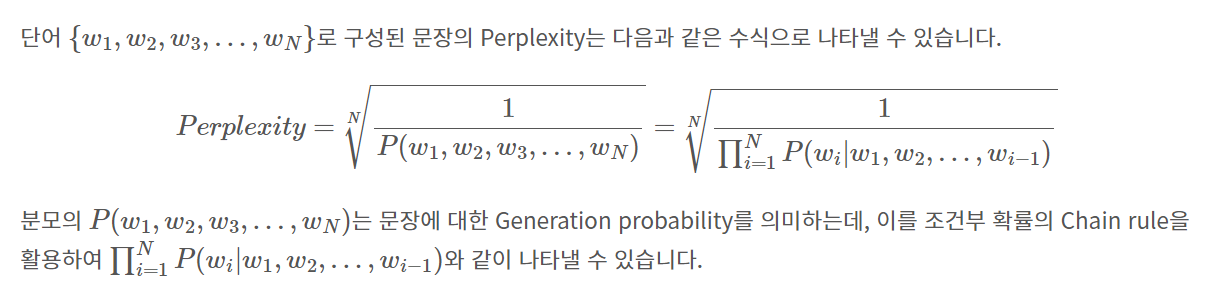


- 그런데 그래프상에서는 perplexity=100까지는 perplexity를 키울수록 오히려 군집화가 잘되는 것처럼 보였다. 
  - 때문에 perplexity를 아예 키워서 다시 확인해본 결과 과하게 선형화되는 것처럼 이미지가 나오다가 다시하나의 군집처럼 변하는 것을 확인하였다. 
    - 때문에 지나치게 낮은 perplexity보다는 조금 큰 수치가 robust하고, 
    - 지나치게 큰 perplexity는 군집화를 할 수 없어 50~100사이가 좋은 것으 확인하였다.
  


참고: https://supkoon.tistory.com/41

# 수고하셨습니다!